## MOVIE RECOMMENDATION

- A reccomendation system which works on the algorithm of most correlated features of the given input by discovering some patterns among the dataset using pandas.

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('ml-100k/u.data',sep='\t')
df.columns=['user_id','item_id','reviews','timespan']
df.head()

,user_id,item_id,reviews,timespan
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806


In [7]:
movie_data=pd.read_csv('ml-100k/u.item',sep='\|',header=None)
movie_data=movie_data[[0,1]]
movie_data.columns=['item_id','title']
movie_data.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
review_data=pd.merge(df,movie_data,on='item_id')
review_data.head()

,user_id,item_id,reviews,timespan,title
0,186,302,3,891717742,L.A. Confidential (1997)
1,191,302,4,891560253,L.A. Confidential (1997)
2,49,302,4,888065432,L.A. Confidential (1997)
3,54,302,4,880928519,L.A. Confidential (1997)
4,62,302,3,879371909,L.A. Confidential (1997)


In [17]:
review_data.groupby('title').mean()['reviews']

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: reviews, Length: 1664, dtype: float64

In [18]:
review_data.groupby('title').count()['reviews']

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: reviews, Length: 1664, dtype: int64

In [19]:
movie_status=pd.merge(review_data.groupby('title').mean()['reviews'],review_data.groupby('title').count()['reviews'],on='title')
movie_status.columns=['Ratings','Total Reviews']
movie_status.head()

,Ratings,Total Reviews
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


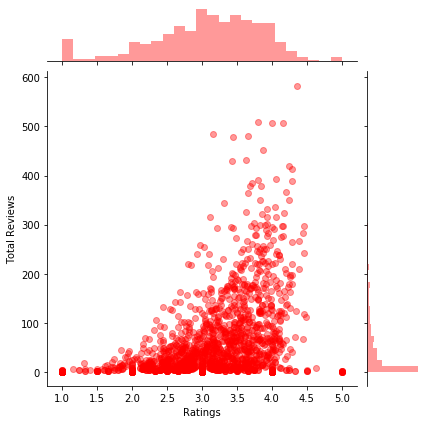

In [27]:
sns.jointplot(x='Ratings',y='Total Reviews',data=movie_status,color='red',alpha=0.4,kind='scatter')

In [29]:
movie_pivot_table=review_data.pivot_table(index='user_id',columns='title',values='reviews')

In [30]:
movie_pivot_table

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
star_wars_data=movie_pivot_table['Star Wars (1977)']

In [56]:
corr_with_starwars=pd.DataFrame(movie_pivot_table.corrwith(star_wars_data))
corr_with_starwars.columns=['Correlations']
corr_with_starwars=corr_with_starwars.dropna()
corr_with_starwars

,Correlations
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [66]:
highly_recomended=pd.merge(corr_with_starwars,movie_status,on='title').drop(columns=['Ratings']).sort_values(by='Correlations',ascending=False)

In [67]:
highly_recomended=highly_recomended[highly_recomended['Total Reviews']>100]

In [68]:
highly_recomended

,Correlations,Total Reviews
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [82]:
def movie_recomendation(movie_name):
    movie=movie_pivot_table[movie_name]
    corr_with_movie=movie_pivot_table.corrwith(movie)
    corr_with_movie.columns=['Correlations']
    corr_with_movie=corr_with_movie.dropna()
    corr_with_movie=pd.DataFrame(corr_with_movie,columns=['Correlations'])
    highly_recomended=corr_with_movie.join(movie_status['Total Reviews']).sort_values(by='Correlations',ascending=False)
    highly_recomended=highly_recomended[highly_recomended['Total Reviews']>100]
    return highly_recomended

In [87]:
movie_name=input()
movie_recomendation(movie_name)

12 Angry Men (1957)


,Correlations,Total Reviews
title,,
12 Angry Men (1957),1.000000,125
Ulee's Gold (1997),0.619544,184
Rear Window (1954),0.570513,209
Seven Years in Tibet (1997),0.549939,155
Clerks (1994),0.528173,148
...,...,...
Spawn (1997),-0.385814,143
Multiplicity (1996),-0.428845,134
Down Periscope (1996),-0.432461,101
